In [ ]:
!unzip /content/drive/MyDrive/Colab_Notebooks/Ptyxiaki/LeavesBigDataset.zip

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Activation
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
import tensorflow.keras.backend as K
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
import pickle
import random
import pandas as pd 
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from datetime import datetime
from packaging import version

In [ ]:
!pip list | grep tensorflow

tensorflow                    2.4.0          
tensorflow-addons             0.8.3          
tensorflow-datasets           4.0.1          
tensorflow-estimator          2.4.0          
tensorflow-gcs-config         2.4.0          
tensorflow-hub                0.10.0         
tensorflow-metadata           0.26.0         
tensorflow-privacy            0.2.2          
tensorflow-probability        0.11.0         


In [ ]:
dirtrain='/content/LeavesBigDataset/train'
dirtest='/content/LeavesBigDataset/test'


#variable that has the name of the diseases in oerder of the class
categories=["Healthy","Diseased"]

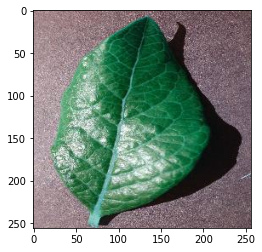

In [ ]:
for c in categories:
    path=os.path.join(dirtrain,c)
    for i in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,i))
        #print(img_array.shape)
        plt.imshow(img_array)
        plt.show()
        break
    break

In [ ]:
training_data = []
def create_training_data():
    d=0
    count=[]
    for c in categories:
        path=os.path.join(dirtrain,c)#creating the path of each class (folder)
        class_num=categories.index(c)#label is equal to the position of the class in 'categories' variable
        c=0
        for i in os.listdir(path):
            c=c+1
            try:
                img_array=cv2.imread(os.path.join(path,i))#creating the path of each image
                training_data.append([img_array,class_num])
            except Exception as e:
                pass
        count.append(c)
    return count

count_train=create_training_data() #function called to extract images from the training folder

KeyboardInterrupt: ignored

In [ ]:

testing_data = []
def create_testing_data():
    count=[]
    for c in categories:
        path=os.path.join(dirtest,c)
        class_num=categories.index(c)
        c=0
        for i in os.listdir(path):
            c=c+1
            try:
                img_array=cv2.imread(os.path.join(path,i))
                testing_data.append([img_array,class_num])
            except Exception as e:
                pass
        count.append(c)
    return count

count_test=create_testing_data() #function called to extract images from the testing folder


In [ ]:
print(len(training_data))
print(count_train)
print(len(testing_data))
print(count_test)

NameError: ignored

In [ ]:
random.shuffle(training_data)
random.shuffle(testing_data)

In [ ]:
x_train = []
y_train = []
x_test = []
y_test = []


In [ ]:

#separating the images and label for the model
for features, label in training_data:
    x_train.append(features)
    y_train.append(label)
x_train=np.array(x_train).reshape(-1,256,256,3)
#reshaping -1 means that the it can be any value i.e. the original value which is the no. of images
#256x256 for the dimension of the image and 3 for the the layers Red Green and Blue (RGB)


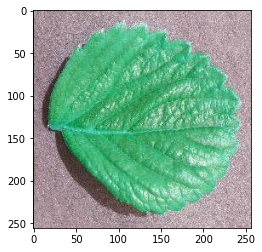

In [ ]:
#displaying an image
x=cv2.resize(training_data[0][0],(256,256))
plt.imshow(x,cmap='gray')



In [ ]:

for features, label in testing_data:
    x_test.append(features)
    y_test.append(label)
x_test=np.array(x_test).reshape(-1,256,256,3)

In [ ]:
#creating the neural network model
    
K.clear_session()
model=Sequential() 
model.add(layers.Conv2D(32,(3,3),padding='same',input_shape=(256,256,3),activation='relu'))
model.add(layers.Conv2D(32,(3,3),activation='relu'))


model.add(layers.MaxPool2D(pool_size=(8,8)))

model.add(layers.Conv2D(32,(3,3),padding='same',activation='relu'))
model.add(layers.Conv2D(32,(3,3),activation='relu'))

model.add(layers.MaxPool2D(pool_size=(8,8)))

model.add(Activation('relu'))

model.add(Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(2,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])


In [ ]:
#compiling the network using the following loss and optimizer
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 254, 254, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 31, 31, 32)        9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
activation (Activation)      (None, 3, 3, 32)          0

In [ ]:

#converting the training label to categorical
y_train_cat=to_categorical(y_train,2) #2 in the no. of categories

In [ ]:
y_test_cat=to_categorical(y_test,2)


In [ ]:
checkpoint = ModelCheckpoint("bestmodel.hdf5", monitor='loss', verbose=1,
    save_best_only=True, mode='auto', save_freq=1)

#fit the model i.e. training the model and batch size can be varies
model.fit(x_train,y_train_cat,batch_size=32,
          epochs=10,verbose=1,validation_split=0.15,shuffle=True, callbacks=[checkpoint])
#validating the model with 15% data after every epoch which is also shuffled after each epoch


KeyboardInterrupt: ignored

In [ ]:

#saving the trained model so that no need to fit again for next time
model.save("leaf_disease_coloured.h5")


In [ ]:

#example of loading the saved model
new_model=tf.keras.models.load_model("/content/drive/MyDrive/Colab_Notebooks/Ptyxiaki/bestmodel.hdf5")


In [ ]:

#evaluating the saved model
loss, acc = new_model.evaluate(x_test,y_test_cat, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100*acc))



IndexError: ignored

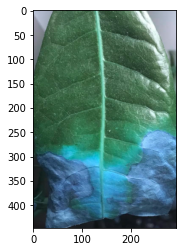

In [ ]:
#predicting a image using the model

#'d' is the path of the image

#d='/content/LeavesBigDataset/train/Healthy/14d46dfe-5348-428c-af6b-82b6625ce6c3___GH_HL Leaf 483.1.JPG'
#d='/content/healthy.jpg'
d='/content/sick_1.PNG'
img=cv2.imread(d)
plt.imshow(img, cmap='gray')


Original Dimensions :  (192, 263, 3)
Resized Dimensions :  (256, 256, 3)


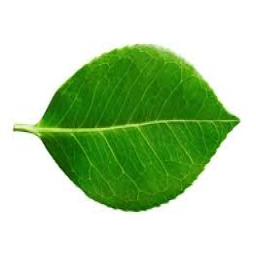

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/download.jpg')
 
print('Original Dimensions : ',img.shape)
 
width = 256
height = 256
dim = (width, height)
# resize image
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
 
print('Resized Dimensions : ',resized.shape)
cv2_imshow(resized)
my_image = resized

In [ ]:
#reshaping the image to make it compatible for the argument of predict function
my_image=my_image.reshape(-1,256,256,3)
print('Resized Dimensions : ',my_image.shape)


Resized Dimensions :  (1, 256, 256, 3)


In [ ]:
#predicting the class of the image
predict_class=new_model.predict_classes(my_image)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
categories[predict_class[0]]

'Healthy'

In [ ]:
pred = new_model.predict(my_image)

res = pd.DataFrame()
res['Healthy'] = pred[:, 0]
res['DiseaseD'] = pred[:, 1]
print(res)

    Healthy  DiseaseD
0  0.999977  0.000023
